In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc500 = np.loadtxt('./random_ipc_index/ipc_500.txt', dtype=int)
ipc500

array([40102, 46587, 14739, 44914, 47092, 40314, 39692, 49205, 17922,
       24848])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 32
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc500))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

1

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc500'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s, loss=2.21]


epoch: 1 done, loss: 4.429199907463044e-05
Acc: 0.1055
[0.001]


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 142.75it/s, loss=1.79]

epoch: 2 done, loss: 3.5884699173038825e-05


Acc: 0.1046
[0.001]


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 221.55it/s, loss=1.66]

epoch: 3 done, loss: 3.316887887194753e-05


Acc: 0.1058
[0.001]


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 180.89it/s, loss=1.5]

epoch: 4 done, loss: 3.0091356165939942e-05


Acc: 0.1087
[0.001]


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 180.66it/s, loss=1.34]

epoch: 5 done, loss: 2.6830357455764897e-05


Acc: 0.1148
[0.001]


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 142.88it/s, loss=1.17]

epoch: 6 done, loss: 2.3380209313472733e-05


Acc: 0.1172
[0.0001]


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 85.86it/s, loss=0.981]

epoch: 7 done, loss: 1.961819907592144e-05


Acc: 0.1174
[0.0001]


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 137.98it/s, loss=0.975]

epoch: 8 done, loss: 1.9502429495332763e-05


Acc: 0.1175
[0.0001]


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 181.23it/s, loss=0.948]

epoch: 9 done, loss: 1.896121284516994e-05


Acc: 0.1176
[0.0001]


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 153.24it/s, loss=0.939]

epoch: 10 done, loss: 1.878905823105015e-05


Acc: 0.1171
[1e-05]


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 199.71it/s, loss=0.849]

epoch: 11 done, loss: 1.6975265680230223e-05


Acc: 0.1173
[1e-05]


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 166.36it/s, loss=1.01]

epoch: 12 done, loss: 2.0268582375138067e-05


Acc: 0.1172
[1e-05]


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 142.94it/s, loss=0.981]

epoch: 13 done, loss: 1.961178168130573e-05


Acc: 0.1172
[1e-05]


Epoch 14: 100%|██████████| 1/1 [00:00<00:00, 153.65it/s, loss=0.874]

epoch: 14 done, loss: 1.7484633644926362e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 166.63it/s, loss=0.886]

epoch: 15 done, loss: 1.7717189621180296e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 16: 100%|██████████| 1/1 [00:00<00:00, 153.53it/s, loss=0.861]

epoch: 16 done, loss: 1.7217596905538812e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 17: 100%|██████████| 1/1 [00:00<00:00, 166.68it/s, loss=0.901]

epoch: 17 done, loss: 1.801043799787294e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 18: 100%|██████████| 1/1 [00:00<00:00, 153.40it/s, loss=0.915]

epoch: 18 done, loss: 1.830232940847054e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 133.10it/s, loss=0.952]

epoch: 19 done, loss: 1.9040810002479702e-05


Acc: 0.1173
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 1/1 [00:00<00:00, 130.24it/s, loss=0.871]

epoch: 20 done, loss: 1.741517917253077e-05


Acc: 0.1172
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 1/1 [00:00<00:00, 117.83it/s, loss=0.943]

epoch: 21 done, loss: 1.8859058400266804e-05


Acc: 0.1172
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 1/1 [00:00<00:00, 153.57it/s, loss=0.934]

epoch: 22 done, loss: 1.8673612430575304e-05


Acc: 0.1173
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 1/1 [00:00<00:00, 133.32it/s, loss=0.882]

epoch: 23 done, loss: 1.763725231285207e-05


Acc: 0.1171
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 1/1 [00:00<00:00, 153.04it/s, loss=0.859]

epoch: 24 done, loss: 1.7171127183246426e-05


Acc: 0.1172
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 1/1 [00:00<00:00, 130.88it/s, loss=0.871]

epoch: 25 done, loss: 1.7422482414986007e-05


Acc: 0.1172
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 1/1 [00:00<00:00, 133.00it/s, loss=0.998]


epoch: 26 done, loss: 1.996707942453213e-05
Acc: 0.1172
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 1/1 [00:00<00:00, 142.84it/s, loss=0.897]

epoch: 27 done, loss: 1.794113268260844e-05


Acc: 0.1172
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 1/1 [00:00<00:00, 83.12it/s, loss=0.885]

epoch: 28 done, loss: 1.7700178432278335e-05


KeyboardInterrupt: 

In [ ]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.5829, tensor(0.0913, device='cuda:0'))

<AxesSubplot: >

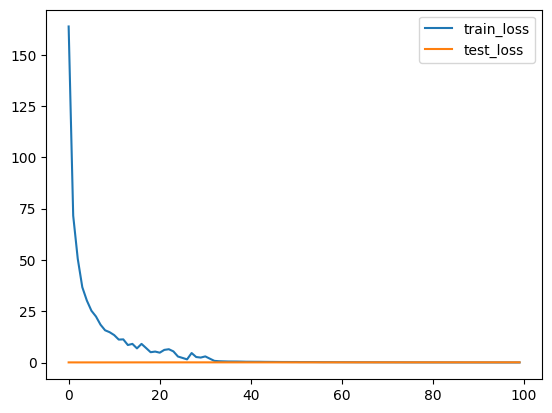

In [ ]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])